In [48]:
#Langkah 1: Memuat Dataset MNIST
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


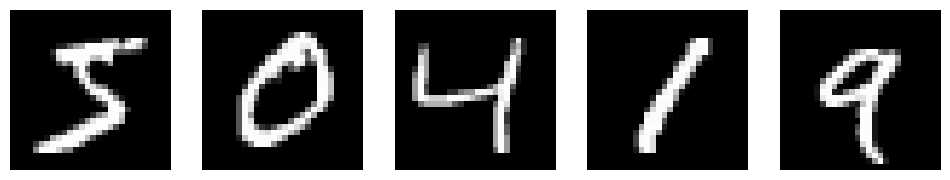

In [49]:
#Langkah 2: Visualisasi Data MNIST
import matplotlib.pyplot as plt

def show_images(images):
    fig, axes = plt.subplots(1, len(images), figsize=(12, 3))
    for i, image in enumerate(images):
        axes[i].imshow(image[0][0], cmap='gray')  # Ubah dari image[0] ke image[0][0]
        axes[i].axis('off')
    plt.show()

# Tampilkan beberapa gambar dari dataset
show_images([train_dataset[i] for i in range(5)])


In [50]:
#Langkah 3: Desain Model Neural Network
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleNN()


In [51]:
#Langkah 4: Setup Hyperparameter
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [ ]:
#Langkah 5: Training Loop
num_epochs = 5

for epoch in range(num_epochs):
    for batch, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (batch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Batch [{batch+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Batch [100/938], Loss: 1.4369
Epoch [1/5], Batch [200/938], Loss: 0.9181
Epoch [1/5], Batch [300/938], Loss: 0.5915
Epoch [1/5], Batch [400/938], Loss: 0.5506
Epoch [1/5], Batch [500/938], Loss: 0.4932
Epoch [1/5], Batch [600/938], Loss: 0.3818
Epoch [1/5], Batch [700/938], Loss: 0.3671
Epoch [1/5], Batch [800/938], Loss: 0.3407
Epoch [1/5], Batch [900/938], Loss: 0.3226
Epoch [2/5], Batch [100/938], Loss: 0.4085
Epoch [2/5], Batch [200/938], Loss: 0.4222
Epoch [2/5], Batch [300/938], Loss: 0.2899
Epoch [2/5], Batch [400/938], Loss: 0.4299
Epoch [2/5], Batch [500/938], Loss: 0.4763
Epoch [2/5], Batch [600/938], Loss: 0.2470
Epoch [2/5], Batch [700/938], Loss: 0.2705
Epoch [2/5], Batch [800/938], Loss: 0.5586
Epoch [2/5], Batch [900/938], Loss: 0.2727
Epoch [3/5], Batch [100/938], Loss: 0.2229
Epoch [3/5], Batch [200/938], Loss: 0.2905
Epoch [3/5], Batch [300/938], Loss: 0.2914
Epoch [3/5], Batch [400/938], Loss: 0.4174
Epoch [3/5], Batch [500/938], Loss: 0.1792
Epoch [3/5]

In [ ]:
#Langkah 6: Evaluasi Model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

model.eval()
with torch.no_grad():
    all_labels = []
    all_preds = []

    for images, labels in test_loader:
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels)
        all_preds.extend(preds)

acc = accuracy_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds, average='weighted')
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
cm = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {acc:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print('Confusion Matrix:')
print(cm)

Accuracy: 0.9272
F1 Score: 0.9271
Precision: 0.9274
Recall: 0.9272
Confusion Matrix:
[[ 969    0    2    2    0    2    3    1    1    0]
 [   0 1104    5    3    0    1    3    2   17    0]
 [  11    1  954   12    8    0   10   12   20    4]
 [   3    1   25  922    0   23    2   14   13    7]
 [   1    3    8    0  889    0   10    3    5   63]
 [  11    2    7   36    5  774   11    9   28    9]
 [  16    3    6    1    7   11  908    3    3    0]
 [   3    8   26    6    5    0    0  952    2   26]
 [  11    4    8   23    7   21    9   12  871    8]
 [  12    7    1   11   16    6    1   21    5  929]]


Deskripsi dan Penjelasan Hasil:

Hasil akhir menunjukkan bahwa akurasi, yang didapat mendekati 1 atau memperoleh hasil yang tinggi sehingga menunjukkan kemampuan model yang juga semakin baik untuk mengenali digit tulisan tangan dengan benar. Selain itu nilai F1 Score, Precision, Recall dan Confusion metrix juga menghasilkan nilai yang tinggi atau mendekati 1 sehingga membantu dalam memberikan informasi terkait kemampuan kinerja model dalam hal presisi dan menemukan kelas positif. DAn ini dapat membantu untuk mengetahui bagimana model yang cocok untuk klasifikasi digit tulisan tangan MNIST.